In [1]:
# Additional libraries required to plot and download data
!pip install keras tensorflow
!pip install matplotlib

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

from liltorch.nn.fully_connected import FullyConnectedLayer
from liltorch.nn.activation import Tanh
from liltorch.nn.network import Network

from liltorch.nn.loss import MeanSquaredError
from liltorch.nn.optimzer import GD

In [ ]:
lr = 0.1
epochs = 25
batch_size = 16

# Downloading and visualizing the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

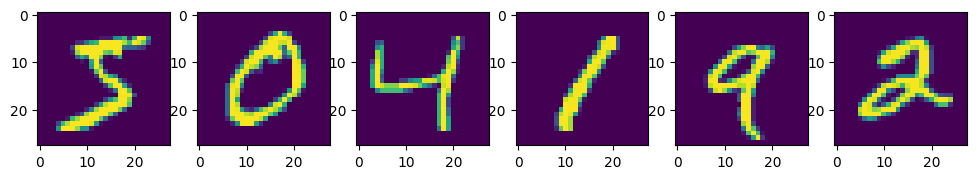

In [ ]:
n = 6

_, axs = plt.subplots(1, n, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(x_train[0:n], axs):
    ax.imshow(img)
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

print(f'shape of xtrain {x_train.shape} xtrain {y_train.shape} and xtrain {x_test.shape} xtest {x_test.shape}')

shape of xtrain (60000, 784) xtrain (60000, 10) and xtrain (10000, 784) xtest (10000, 784)


# Build, train and test the MLP model

In [ ]:
model = Network(lr=lr)
model.add(FullyConnectedLayer(28*28, 100))
model.add(Tanh())
model.add(FullyConnectedLayer(100, 50))
model.add(Tanh())
model.add(FullyConnectedLayer(50, 10))
model.add(Tanh())

optimizer = GD(model=model)

In [ ]:
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0
    dataset_size = len(x_train)
    criterion = MeanSquaredError()
    for batch_begin in range(0, dataset_size, batch_size):
        batch_end = min(batch_begin + batch_size, dataset_size)
        data = x_train[batch_begin:batch_end]
        target = y_train[batch_begin:batch_end]

        optimizer.zero_grad()

        # forward
        output = model.forward(data)
        epoch_loss += criterion.forward(target, output)

        # backward pass
        error = criterion.backward(target, output)
        model.backward(error)
        optimizer.step()
        correct += np.sum((np.argmax(output, axis=1) == np.argmax(target, axis=1)))
    print(f'Epoch {epoch} -> Average loss {epoch_loss/dataset_size} / Average Accuracy {(correct/dataset_size):.4f}')

Epoch 0 -> Average loss 0.005855663280072988 / Average Accuracy 0.4864
Epoch 1 -> Average loss 0.002878347700019037 / Average Accuracy 0.7298
Epoch 2 -> Average loss 0.0022292722669247566 / Average Accuracy 0.8136
Epoch 3 -> Average loss 0.0018648248294065738 / Average Accuracy 0.8410
Epoch 4 -> Average loss 0.0016041505021474334 / Average Accuracy 0.8590
Epoch 5 -> Average loss 0.0013697349405033916 / Average Accuracy 0.8773
Epoch 6 -> Average loss 0.001210091334082699 / Average Accuracy 0.8924
Epoch 7 -> Average loss 0.0011135417891742672 / Average Accuracy 0.9013
Epoch 8 -> Average loss 0.0010454914097396404 / Average Accuracy 0.9072
Epoch 9 -> Average loss 0.000992061203756293 / Average Accuracy 0.9115
Epoch 10 -> Average loss 0.0009479835068435065 / Average Accuracy 0.9157
Epoch 11 -> Average loss 0.0009105575336868624 / Average Accuracy 0.9192
Epoch 12 -> Average loss 0.0008780660217550284 / Average Accuracy 0.9216
Epoch 13 -> Average loss 0.0008493001781056938 / Average Accuracy

In [ ]:
correct = 0
dataset_size = len(x_test)
for batch_begin in range(0, dataset_size, batch_size):
    batch_end = min(batch_begin + batch_size, dataset_size)
    data = x_test[batch_begin:batch_end]
    target = y_test[batch_begin:batch_end]

    output = model.forward(data)
    correct += np.sum((np.argmax(output, axis=1) == np.argmax(target, axis=1)))

print(f'Test Accuracy: {(correct/dataset_size):.4f}')

Test Accuracy: 0.9395
